#import all the necessary libraries required for data visualization

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
data = pd.read_csv("../input/data.csv")

In [5]:
print(data.head())

         id diagnosis     ...       fractal_dimension_worst  Unnamed: 32
0    842302         M     ...                       0.11890          NaN
1    842517         M     ...                       0.08902          NaN
2  84300903         M     ...                       0.08758          NaN
3  84348301         M     ...                       0.17300          NaN
4  84358402         M     ...                       0.07678          NaN

[5 rows x 33 columns]


In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
print(data.describe())

                 id     ...       Unnamed: 32
count  5.690000e+02     ...               0.0
mean   3.037183e+07     ...               NaN
std    1.250206e+08     ...               NaN
min    8.670000e+03     ...               NaN
25%    8.692180e+05     ...               NaN
50%    9.060240e+05     ...               NaN
75%    8.813129e+06     ...               NaN
max    9.113205e+08     ...               NaN

[8 rows x 32 columns]


In [8]:
data.shape

(569, 33)

In [9]:
# feature names as a list
col = data.columns

In [10]:
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [11]:
# Drop useless variables
data = data.drop(['Unnamed: 32','id'],axis = 1)

# Reassign target
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [12]:
# 2 datasets
M = data[(data['diagnosis'] != 0)]
B = data[(data['diagnosis'] == 0)]

In [13]:
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"].values

In [14]:
scale = ss()
X = scale.fit_transform(X)
print(X.shape)

(569, 30)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [16]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=50)
etc = ExtraTreesClassifier(n_estimators=50)
knc = KNeighborsClassifier()
xg = XGBClassifier(learning_rate=0.5, reg_alpha= 5, reg_lambda= 0.1)
gbm = GradientBoostingClassifier()

In [17]:
#Train the data
dt1 = dt.fit(X_train,y_train)
rf1 = rf.fit(X_train,y_train)
etc1 = etc.fit(X_train,y_train)
knc1 = knc.fit(X_train,y_train)
xg1 = xg.fit(X_train,y_train)
gbm1 = gbm.fit(X_train,y_train)

In [18]:
#Predict the data
y_pred_dt = dt1.predict(X_test)
y_pred_rf = rf1.predict(X_test)
y_pred_etc= etc1.predict(X_test)
y_pred_knc= knc1.predict(X_test)
y_pred_xg= xg1.predict(X_test)
y_pred_gbm= gbm1.predict(X_test)

In [19]:
#Fetch probabilities
y_pred_dt_prob = dt1.predict_proba(X_test)
y_pred_rf_prob = rf1.predict_proba(X_test)
y_pred_etc_prob = etc1.predict_proba(X_test)
y_pred_knc_prob = knc1.predict_proba(X_test)
y_pred_xg_prob = xg1.predict_proba(X_test)
y_pred_gbm_prob= gbm1.predict_proba(X_test)

In [20]:
#Get accuracy scores
accuracy_score(y_test,y_pred_dt)
accuracy_score(y_test,y_pred_rf)
accuracy_score(y_test,y_pred_etc)
accuracy_score(y_test,y_pred_knc)
accuracy_score(y_test,y_pred_xg)
accuracy_score(y_test,y_pred_gbm)

0.9517543859649122

In [21]:
print(accuracy_score(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_etc))
print(accuracy_score(y_test,y_pred_knc))
print(accuracy_score(y_test,y_pred_xg))
print(accuracy_score(y_test,y_pred_gbm))

0.9210526315789473
0.956140350877193
0.9473684210526315
0.9649122807017544
0.9385964912280702
0.9517543859649122


In [22]:
#Confusion matrix
confusion_matrix(y_test,y_pred_dt)

array([[127,  10],
       [  8,  83]])

In [23]:
confusion_matrix(y_test,y_pred_rf)

array([[132,   5],
       [  5,  86]])

In [24]:
#ROC Graph
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_dt_prob[: , 1], pos_label= 1)

In [25]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf_prob[: , 1], pos_label= 1)

In [26]:
#Fetch AUC
auc(fpr_dt,tpr_dt)

0.9195476056789925

In [27]:
auc(fpr_rf,tpr_rf)

0.9904146947942568

In [28]:
#Calculate Precision, Recall and F-score
precision_recall_fscore_support(y_test,y_pred_dt)

(array([0.94074074, 0.89247312]),
 array([0.9270073 , 0.91208791]),
 array([0.93382353, 0.90217391]),
 array([137,  91]))

In [29]:
precision_recall_fscore_support(y_test,y_pred_rf)

(array([0.96350365, 0.94505495]),
 array([0.96350365, 0.94505495]),
 array([0.96350365, 0.94505495]),
 array([137,  91]))

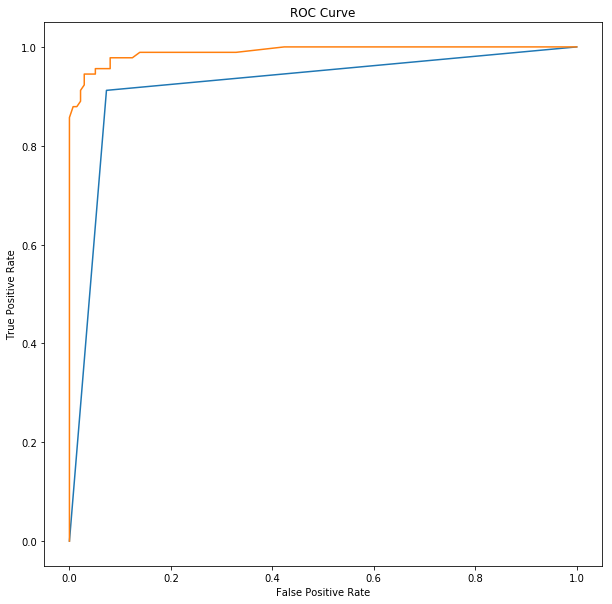

In [30]:
#Plotting ROC Curve
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.plot(fpr_dt, tpr_dt, label = "dt")
ax.plot(fpr_rf, tpr_rf, label = "rf")
plt.show()

In [31]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
data_1 = data.drop(drop_list1,axis = 1 )        
data_1.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,1,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,1,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,1,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


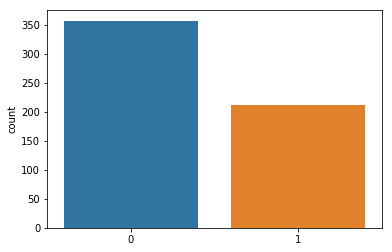

In [32]:
ax = sns.countplot(y,label="Count")
y = data.diagnosis
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

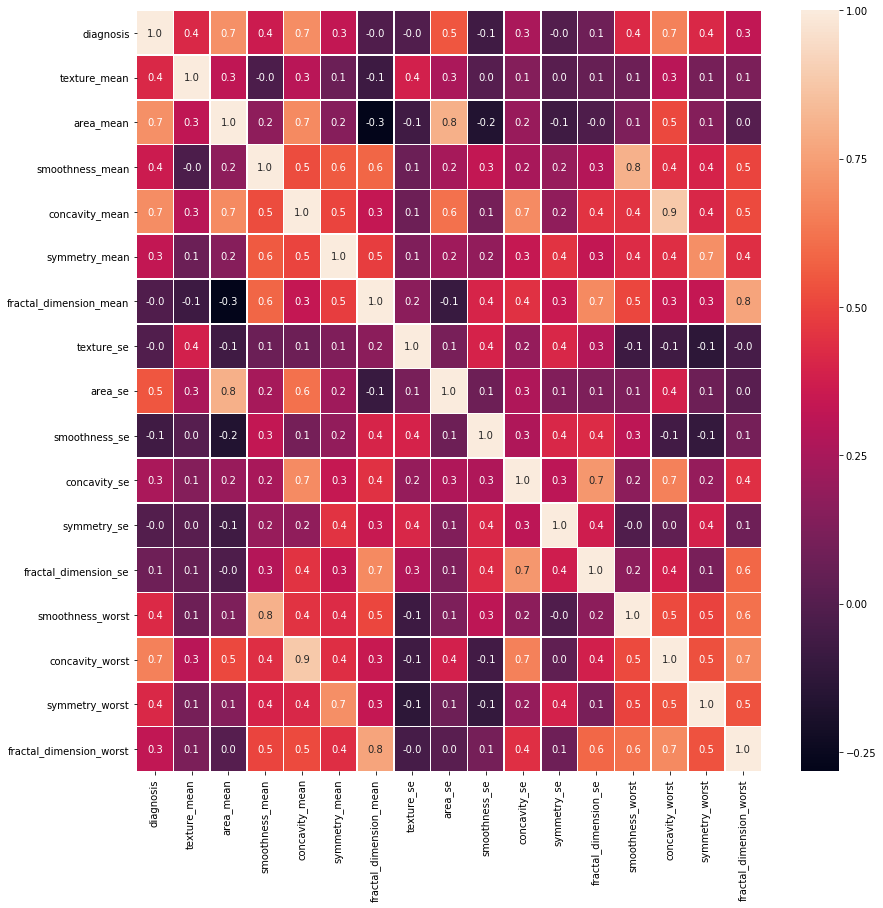

In [33]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

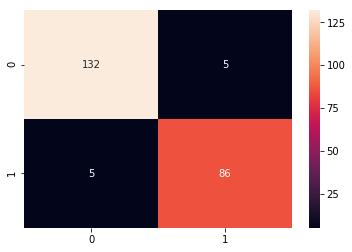

In [34]:
cm = confusion_matrix(y_test,rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

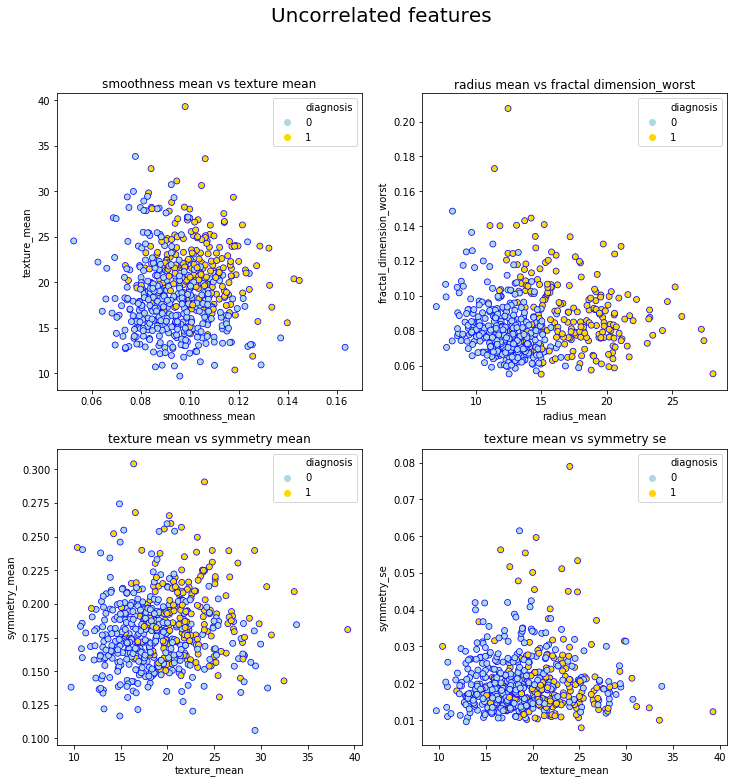

In [35]:
# seaborn version : Uncorrelated features
fig = plt.figure(figsize=(12,12))
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'blue'
plt.subplot(221)
ax1 = sns.scatterplot(x = data['smoothness_mean'], y = data['texture_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()

In [36]:
confusion_matrix(y_test,y_pred_etc)
confusion_matrix(y_test,y_pred_knc)
confusion_matrix(y_test,y_pred_xg)
confusion_matrix(y_test,y_pred_gbm)

array([[133,   4],
       [  7,  84]])

In [37]:
fpr_etc, tpr_etc, thresholds = roc_curve(y_test, y_pred_etc_prob[: , 1], pos_label= 1)

In [38]:
fpr_knc, tpr_knc, thresholds = roc_curve(y_test, y_pred_knc_prob[: , 1], pos_label= 1)

In [39]:
fpr_xg, tpr_xg, thresholds = roc_curve(y_test, y_pred_xg_prob[: , 1], pos_label= 1)

In [40]:
fpr_gbm, tpr_gbm, thresholds = roc_curve(y_test, y_pred_gbm_prob[: , 1], pos_label= 1)

In [41]:
auc(fpr_etc,tpr_etc)

0.9923397770113098

In [42]:
auc(fpr_knc,tpr_knc)

0.978743883853373

In [43]:
auc(fpr_xg,tpr_xg)

0.9889307772519451

In [44]:
auc(fpr_gbm,tpr_gbm)

0.991577765300393

In [45]:
precision_recall_fscore_support(y_test,y_pred_etc)

(array([0.94964029, 0.94382022]),
 array([0.96350365, 0.92307692]),
 array([0.95652174, 0.93333333]),
 array([137,  91]))

In [46]:
precision_recall_fscore_support(y_test,y_pred_knc)

(array([0.95104895, 0.98823529]),
 array([0.99270073, 0.92307692]),
 array([0.97142857, 0.95454545]),
 array([137,  91]))

In [47]:
precision_recall_fscore_support(y_test,y_pred_xg)

(array([0.94244604, 0.93258427]),
 array([0.95620438, 0.91208791]),
 array([0.94927536, 0.92222222]),
 array([137,  91]))

In [48]:
precision_recall_fscore_support(y_test,y_pred_gbm)

(array([0.95      , 0.95454545]),
 array([0.97080292, 0.92307692]),
 array([0.96028881, 0.93854749]),
 array([137,  91]))

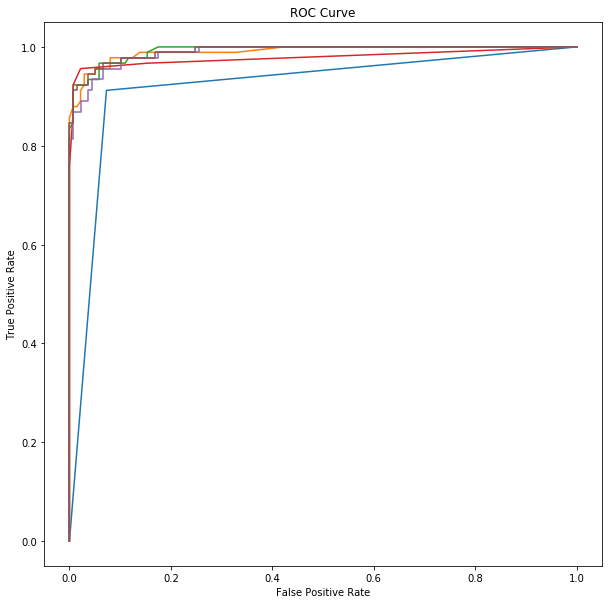

In [49]:
#Plotting ROC Curve
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.plot(fpr_dt, tpr_dt, label = "dt")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_etc, tpr_etc, label = "etc")
ax.plot(fpr_knc, tpr_knc, label = "knc")
ax.plot(fpr_xg, tpr_xg, label = "xg")
ax.plot(fpr_gbm, tpr_gbm, label = "gbm")
plt.show()